<a href="https://colab.research.google.com/github/OskarKrafft/Machine-Learning-Project/blob/main/03_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F1 and MCC

In [6]:
# set seed
import numpy as np

import seaborn as sns
from matplotlib import rcParams

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence

rs = RandomState(MT19937(SeedSequence(3612934)))

In [4]:
# create dummy dataframe
np.random.seed(0) ; 
f1 = np.random.normal(0.8, 0.07, 40)
mcc = np.random.normal(0.8, 0.07, 40)

m= np.array([['a', 'b', 'c', 'd']])
model = np.repeat(m, 10)

model_data = pd.DataFrame({'model': model, 'f1': f1, 'mcc': mcc})

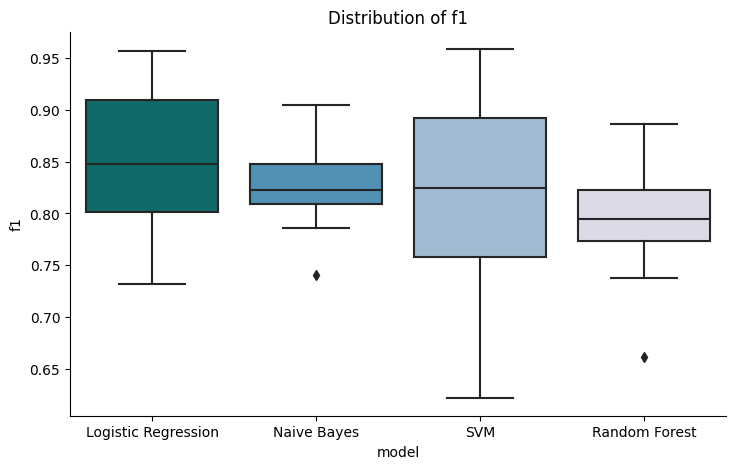

In [7]:
# f1 boxplot per model

catplot = sns.catplot(data=model_data, x="model", y="f1", kind="box", palette='PuBuGn_r')
catplot.set(xticklabels=["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"])
catplot.set(title='Distribution of f1')
catplot.fig.set_size_inches(8 ,4.5)

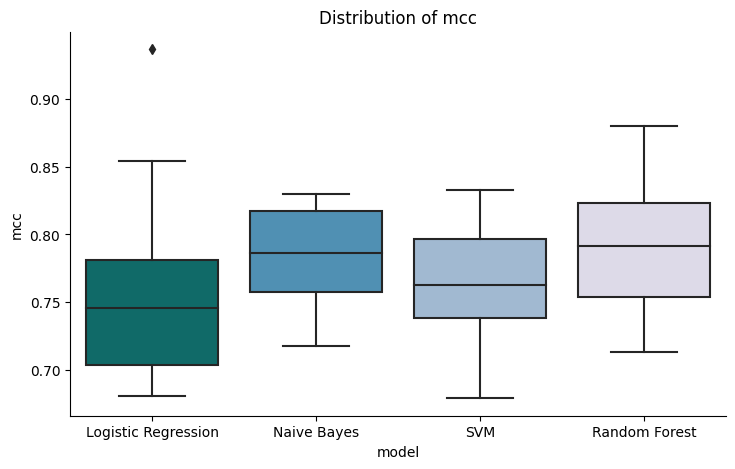

In [8]:
# mcc boxplot per model

catplot = sns.catplot(data=model_data, x="model", y="mcc", kind="box", palette='PuBuGn_r')
catplot.set(xticklabels=["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"])
catplot.set(title='Distribution of mcc')
catplot.fig.set_size_inches(8 ,4.5)

# Learning Curves

In [82]:
import scikitplot as skplt

import sklearn
from sklearn.datasets import load_digits, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

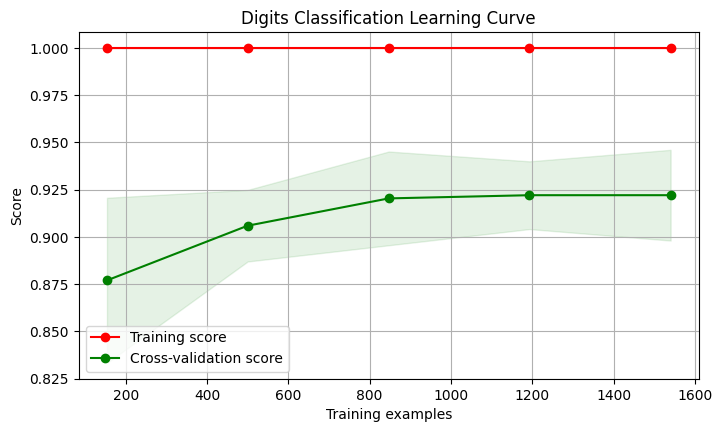

In [78]:
digits = load_digits()
X_digits, Y_digits = digits.data, digits.target

X_digits_train, X_digits_test, Y_digits_train, Y_digits_test = train_test_split(X_digits, Y_digits,
                                                                                train_size=0.8,
                                                                                stratify=Y_digits,
                                                                                random_state=1)

skplt.estimators.plot_learning_curve(LogisticRegression(), X_digits, Y_digits,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(8,4.5), title_fontsize="large", text_fontsize="medium",
                                     title="Digits Classification Learning Curve");

# Visualise feature importance

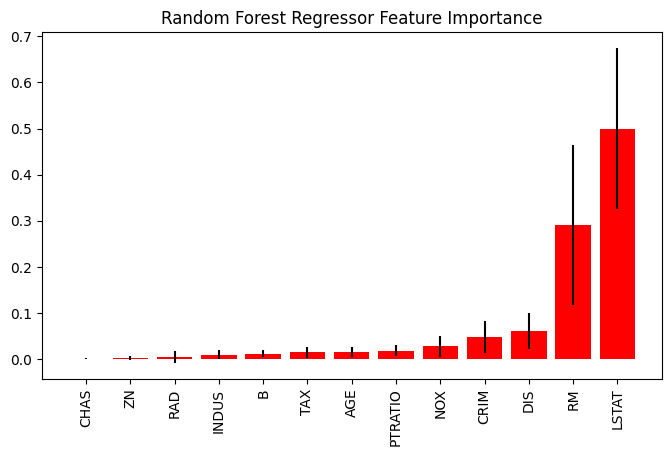

In [83]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target

X_boston_train, X_boston_test, Y_boston_train, Y_boston_test = train_test_split(X_boston, Y_boston,
                                                                                train_size=0.8,
                                                                                random_state=1)

rf_reg = RandomForestRegressor()
rf_reg.fit(X_boston_train, Y_boston_train)
rf_reg.score(X_boston_test, Y_boston_test)


skplt.estimators.plot_feature_importances(rf_reg, feature_names=boston.feature_names, figsize=(8, 4.5),
                                        title_fontsize="large", text_fontsize="medium",
                                        title="Random Forest Regressor Feature Importance",
                                        x_tick_rotation=90, order="ascending");